# Importing libs


In [1]:
import numpy as np
import time
import cv2
import os
import glob
import matplotlib.pyplot as plt

# Specifying paths


In [2]:
weights_path = "yolov3.weights"
config_path = "yolov3.cfg"



# Load the NN in cv2


In [3]:
net = cv2.dnn.readNetFromDarknet(config_path,weights_path)

# get layers names


In [4]:
names = net.getLayerNames()
names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

# Load test image    

In [5]:
image_path = "test6.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

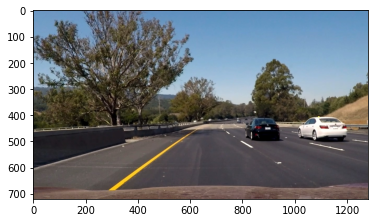

In [6]:
plt.imshow(img)

In [7]:
(H,W) = img.shape[:2]
layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]

In [8]:
layers_names

['yolo_82', 'yolo_94', 'yolo_106']

# Run the inference on test image

In [9]:
blob = cv2.dnn.blobFromImage(img, 1/255.0,(416,416),crop = False,swapRB=False)
net.setInput(blob)
start_t = time.time()
layers_output = net.forward(layers_names)
print("A forward pass through yolov3 took {}".format(time.time() - start_t))

A forward pass through yolov3 took 0.40386080741882324


In [10]:
layers_output[1].shape

(2028, 85)

In [11]:
boxes =[]
confidences = []
classIDs = []

In [12]:
for output in layers_output:
    for detection in output:
        scores = detection[5:]
        classID =  np.argmax(scores)
        confidence = scores[classID]
        
        if confidence > 0.85:
            box = detection[:4] * np.array([W,H,W,H])
            bx , by, bw, bh = box.astype("int")
            x = int(bx - (bw / 2) )
            y = int(by - (bh / 2) )
            
            
            boxes.append([x,y,int(bx),int(bh)])
            confidences.append(confidence)
            classIDs.append(classID)

In [13]:
idxs = cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.8)

In [14]:
labels_path = "coco.names"
labels = open(labels_path).read().strip().split("\n")
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

# Plot boxes in image


In [15]:
if len(idxs) > 0:
    
    for i in idxs.flatten():
        (x,y) = [boxes[i][0], boxes[i][1]]
        (w,h) = [boxes[i][2], boxes[i][3]]
    
    
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cv2.putText(img,"{}: {}".format(labels[classIDs[i]],confidences[i]), ( x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, \
                               0.5, (0,255,255), 2)
    
        
       

cv2.imshow("Image",cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
cv2.waitKey(0)

-1